##Abstracto con Motivación y Audiencia
### Motivación:
La motivación detrás del análisis de los datos elegidos, basados en el conjunto de datos "Bank Marketing Data", radica en la necesidad de comprender y mejorar las estrategias de marketing en la industria bancaria. Este conjunto de datos proporciona una oportunidad única para explorar el comportamiento de los clientes en respuesta a campañas de marketing telefónico. La idea central es aprovechar la información contenida en estos datos para tomar decisiones informadas y diseñar estrategias de marketing más efectivas.

### Audiencia:
La audiencia que podría beneficiarse de este análisis podrían ser:

*   ### Gerentes de Sucursales Bancarias:
Los gerentes de sucursales pueden aprovechar los insights para personalizar las ofertas y estrategias en función de las características de sus clientes locales, lo que podría aumentar las ventas en sus sucursales.

*   ### Profesionales del Marketing Bancario:
Este análisis es relevante para los especialistas en marketing de la industria bancaria que buscan mejorar el rendimiento de sus campañas y aumentar las tasas de conversión de sus productos financieros.
*   ### Analistas Financieros:
Los analistas financieros pueden utilizar los resultados de este análisis para comprender cómo las condiciones del mercado y las estrategias de marketing se relacionan con el éxito de los productos bancarios.

*   ### Economistas y Analistas del Mercado:
Los economistas pueden utilizar los datos para evaluar el impacto de las tasas de interés y las tendencias macroeconómicas en las suscripciones a depósitos, lo que podría proporcionar información útil sobre la salud económica.


*   ### Reportes Financieros:
Los periodistas especializados en finanzas pueden utilizar los insights para informar al público sobre las tendencias actuales en el sector bancario y su relación con las campañas de marketing.

### Objetivo:
El objetivo principal puede ser aumentar la tasa de suscripción a depósitos a plazo fijo entre los clientes.

### Contexto Comercial:
El contexto comercial se refiere al entorno y las circunstancias en las que se llevan a cabo las actividades de marketing y negocios. El contexto comercial incluye la industria bancaria y financiera, donde el banco está buscando estrategias efectivas para promover sus productos financieros, como depósitos a plazo fijo.

### Contexto Analitico:
El problema comercial podria ser la baja tasa de suscripción a depositos a plazo fijo y la necesidad de aumentar esta tasa para mejorar la rentabilidad y la estabilidad financiera del banco.

### Exploración de Datos (EDA):
Incluye la visualizacion de datos, la identificación de patrones, la detección de valores atipicos y la comprensión de las relaciones entre las variables para obtener información valiosa sobre el comportamiento de los clientes y su impacto en las suscripciones a depósitos a plazo fijo.

## Preguntas/Hipótesis que Queremos Responder mediante el Análisis de Datos




1.   Como afecta la edad de los clientes a su suscripción a depósitos a plazo fijo ?

2.   Hay una relacion entre el nivel educativo de los clientes y su disposición a suscribirse a depósitos a plazo fijo ?
3.   Cuál es el impacto de la situación laboral de los clientes en su decisión de suscribirse a depositos a plazo fijo ?


4.   Existen diferencias en las tasas de suscripcion entre los clientes con creditos en incumplimiento y los que no tienen ?

5.   Hay alguna relación entre la Duración de la última llamada, a la decisión de sucripción del cliente a depósito a plazo fijo ?


### Una vez realizado el contexto general de nuestro Dataset, y planteado las hipótesis, vamos a cargar las librerías necesarias para empezar a hacer el análisis y conectarnos con el Dataset que se encuentra cargado en Drive.

In [49]:
# Cargamos nuestro dataset e importamos librerias.
# Librerías para visualización y manipulación de datos
import matplotlib.pyplot as plt  # Visualización de datos
import seaborn as sns  # Mejora de gráficos basados en Matplotlib
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Operaciones numéricas eficientes

# Librerías para construcción de modelos de aprendizaje automático
from sklearn.tree import DecisionTreeClassifier  # Árboles de decisión
from sklearn.ensemble import RandomForestClassifier  # Bosques aleatorios
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.model_selection import cross_val_score  # Validación cruzada
from sklearn.model_selection import GridSearchCV  # Búsqueda de hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de evaluación
from sklearn.tree import plot_tree  # Visualización de árboles

# Librerías para visualización de árboles y gráficos
from sklearn.tree import export_graphviz  # Exportación de árboles en formato DOT
from pydotplus import graph_from_dot_data  # Creación de gráficos a partir de datos DOT
from google.colab import files  # Manipulación de archivos en Colab

# Librerías para manipulación de etiquetas categóricas y curva ROC
from sklearn.preprocessing import LabelEncoder  # Codificación de etiquetas
from sklearn.metrics import roc_curve, auc  # Curva ROC

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/bank-additional-full.csv', delimiter=';') # Delimitador ;

In [52]:
# Realizamos un df.head para visualizar las columnas
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Variables Numéricas:

*   age: La edad del cliente


*   duration: La duración de la última llamada en segundos.
*   campaign: El número de contactos realizados durante esta campaña.
*   pdays: El número de días que pasaron desde el último contacto con el
*   previous: El número de contactos realizados antes de esta campaña.
*   emp.var.rate: Tasa de variacion del empleo.
*   cons.price.idx (Índice de precios al consumidor - indicador mensual).
*   cons.conf.idx (Índice de confianza del consumidor - indicador mensual).
*   euribor3m: Tasa Euribor a 3 meses.
*   nr.employed: Número de empleados.

### Variables Categóricas:

*   job: La profesion o empleo del cliente.
*   marital: El estado civil del cliente.
*   education: El nivel educativo del cliente.
*   default: Si el cliente tiene crédito por defecto ("yes" o "no").
*   housing: Si el cliente tiene un préstamo hipotecario ("yes" o "no").
*   loan: Si el cliente tiene un préstamo personal ("yes" o "no").
*   contact: El método de contacto utilizado para la campaña.
*   month: El mes en que se contactó al cliente.
*   day_of_week: El día de la semana en que se contactó al cliente.
*   poutcome (Resultado de la campaña de marketing anterior).

### Variable Binaria creada (0 o 1)
*   y: Indica si el cliente se suscribio ("yes") o no ("no") a un deposito a plazo fijo despues de la campaña de marketing.

### Vamos a realizar algunas estadísticas descriptivas y visualizaciones para comprender mejor la distribución y las relaciones entre las variables.

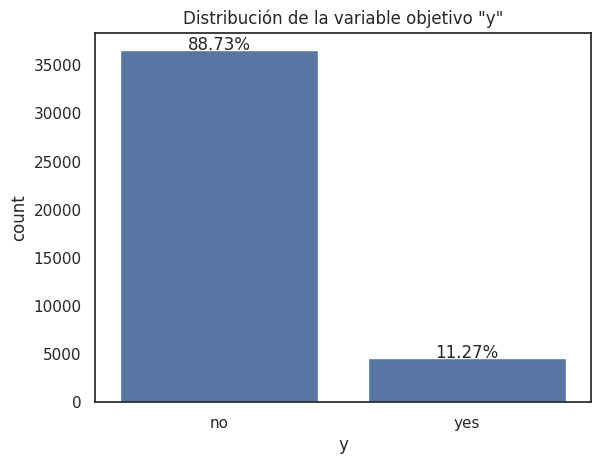

In [54]:

# Estadísticas descriptivas
desc_stats = df.describe(include='all')

# Calcular porcentajes
total = float(len(df))
ax = sns.countplot(x='y', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2%}'.format(height/total), ha="center")

plt.title('Distribución de la variable objetivo "y"')
plt.show()

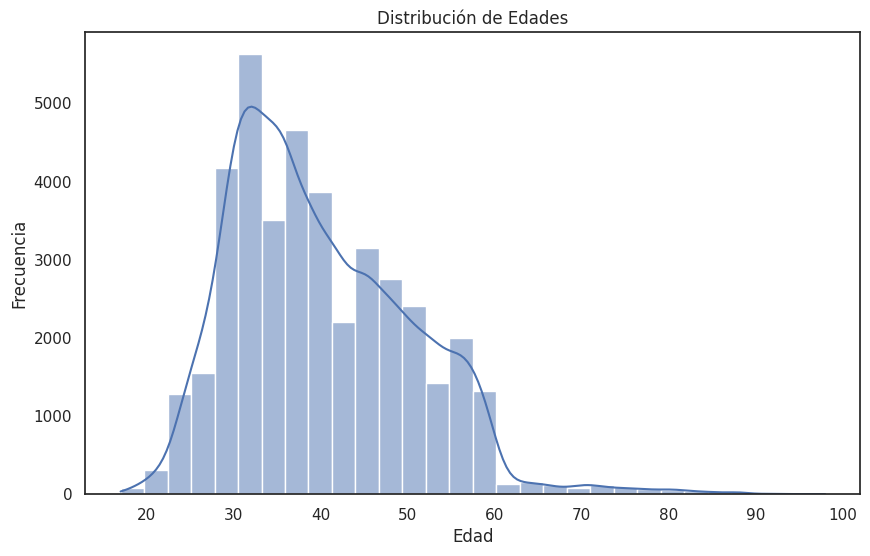

In [55]:
# Visualización de la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

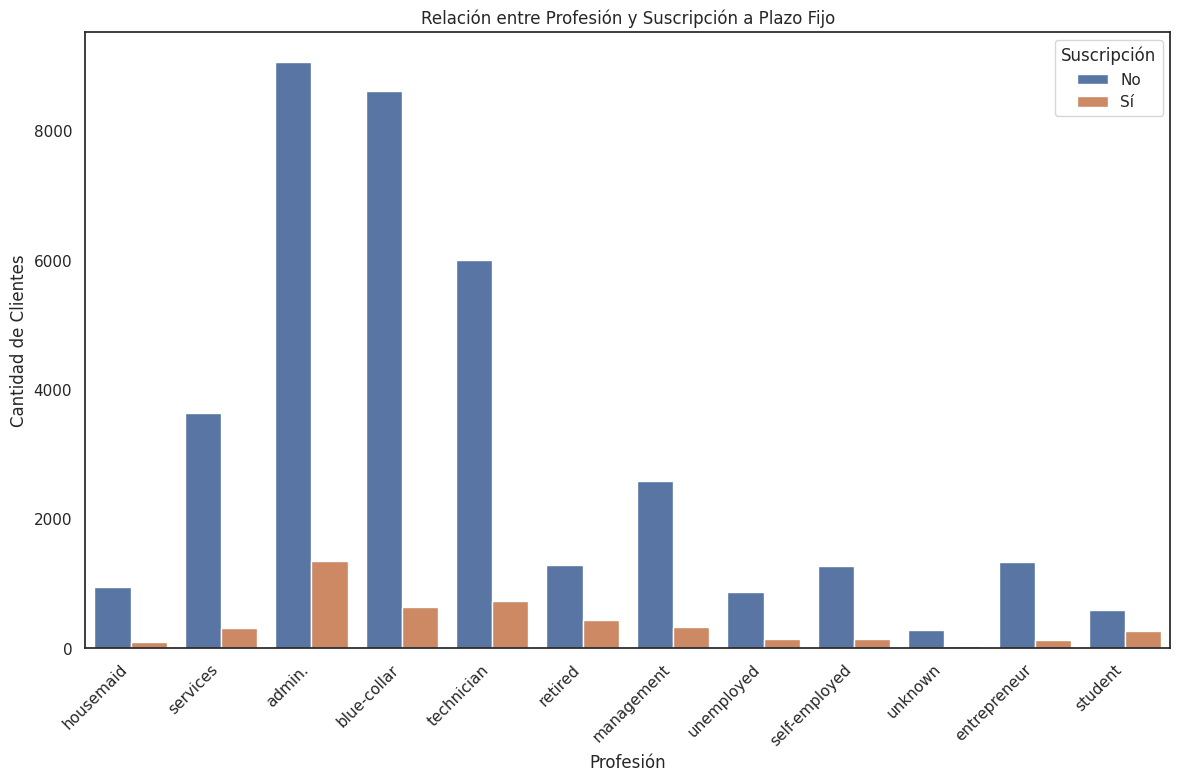

In [56]:
# Visualización de la relación entre 'job' y 'y'
plt.figure(figsize=(14, 8))
sns.countplot(x='job', hue='y', data=df)
plt.title('Relación entre Profesión y Suscripción a Plazo Fijo')
plt.xlabel('Profesión')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

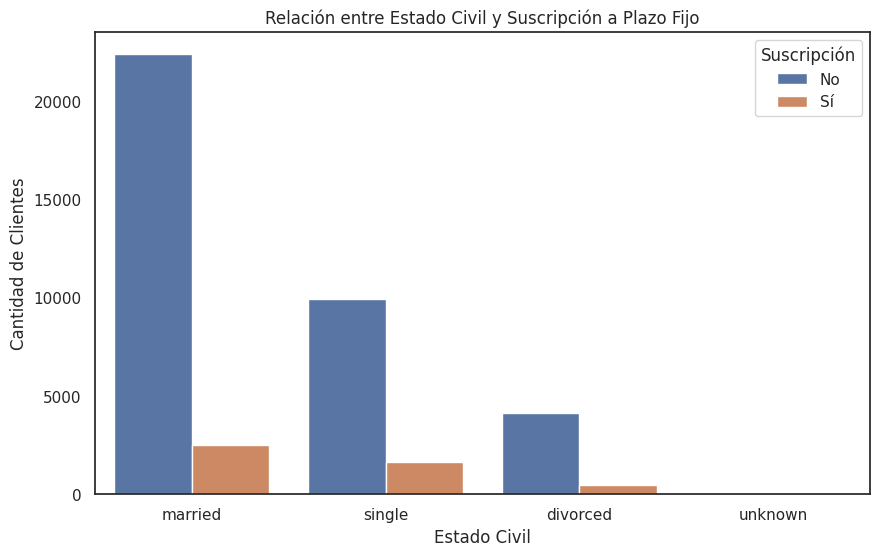

In [57]:
# Visualización de la relación entre 'marital' y 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Relación entre Estado Civil y Suscripción a Plazo Fijo')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

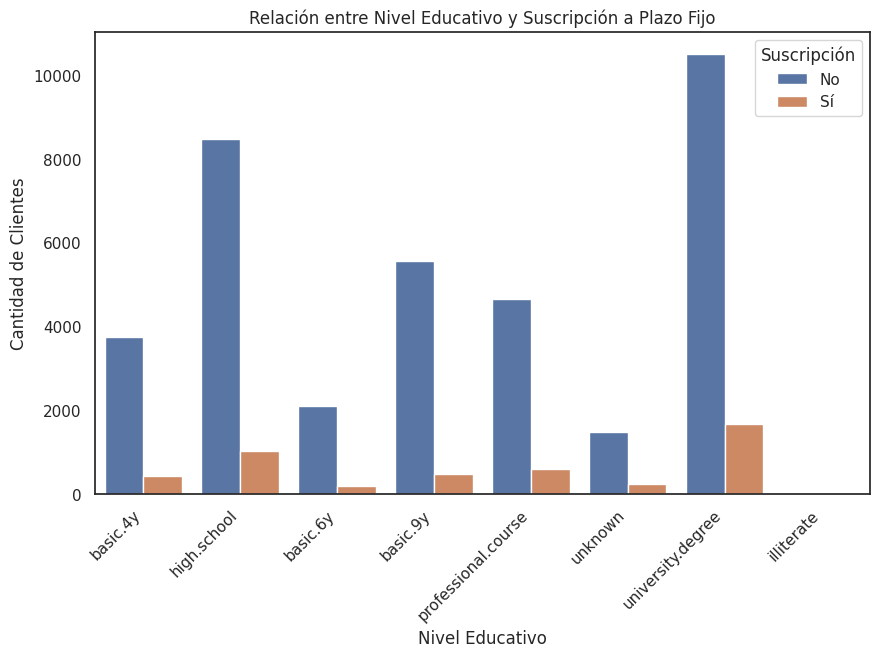

In [58]:
# Visualización de la relación entre 'education' y 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Relación entre Nivel Educativo y Suscripción a Plazo Fijo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

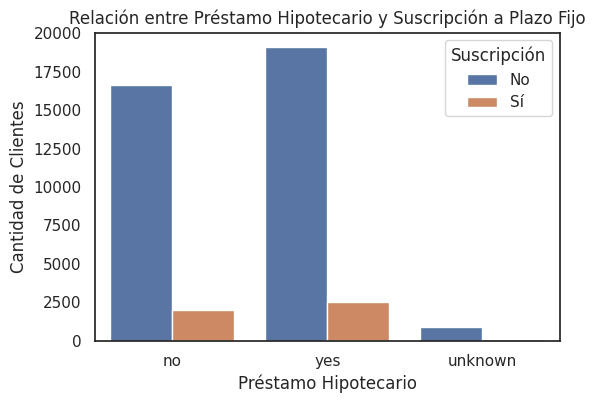

In [59]:
# Visualización de la relación entre 'housing' y 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', hue='y', data=df)
plt.title('Relación entre Préstamo Hipotecario y Suscripción a Plazo Fijo')
plt.xlabel('Préstamo Hipotecario')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

### Después de realizár un breve análisis de distintas variables, nos enfoncamos en nuestra Variable de interés "Edad"

1. ¿Cómo afecta la edad de los clientes a su suscripción a depósitos a plazo fijo?

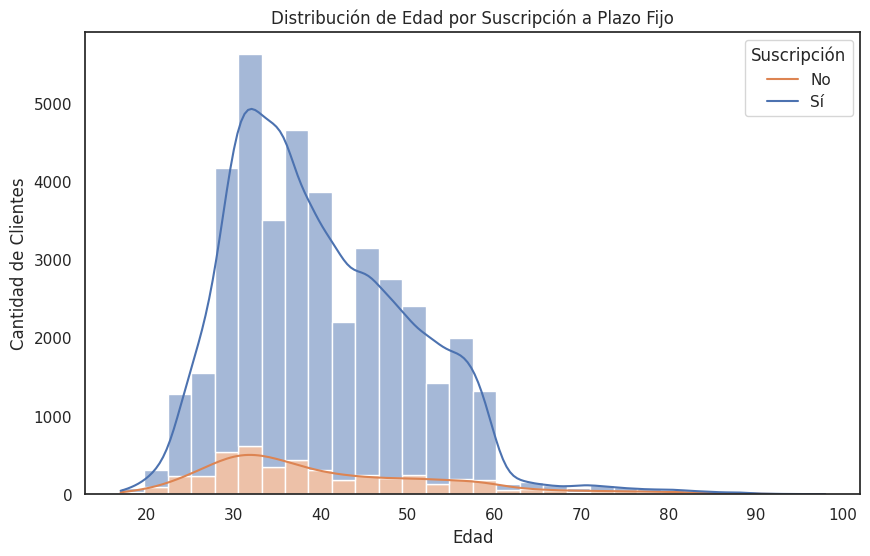

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [60]:
# Visualización de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', bins=30, hue='y', multiple='stack', kde=True)
plt.title('Distribución de Edad por Suscripción a Plazo Fijo')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

# Realizamos un describe para obtener informacion de nuestra Variable "Age"
age_summary = df['age'].describe()
print(age_summary)

*   De esta manera, podemos visualizar una clara distribucion de edad de los clientes, y obtener como puntos fuerte la media que da como resultado 40 y el %50 que es 38.
*   Podemos ver una tendencia en los clientes de 30 a 40 años de edad.
*   La mayoria de los clientes se encuentran en un rango de 25 y 60 años.
*   También podemos ver un cambio rotundo en los clientes mayores a 60 años. Podríamos deducir que es por que cobran algun tipo de jubilación o algun plan social para mayores de edad.







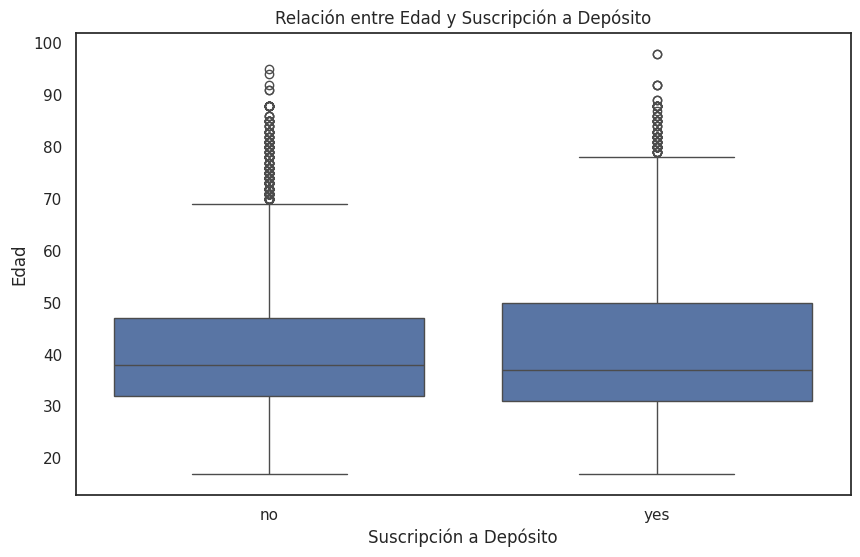

In [61]:
# Variables Numericas vs. Categoricas:
# Edad vs. Suscripción (Variables Bivariadas):

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age') # Usamos boxplot para ver donde se encuentra la media, e identificar Outliers
plt.xlabel('Suscripción a Depósito')
plt.ylabel('Edad')
plt.title('Relación entre Edad y Suscripción a Depósito')
plt.show()


*   Podemos ver el rango de las lineas de los bigotes, de los que si se suscribieron a un depósito y los que no. Si bien la linea de la mediana es similar
*   Vemos mas datos atípicos en los que no tuvieron una suscripción a un depósito a plazo fijo.



2. ¿Hay una relación entre el nivel educativo de los clientes y su disposición a suscribirse a depósitos a plazo fijo?

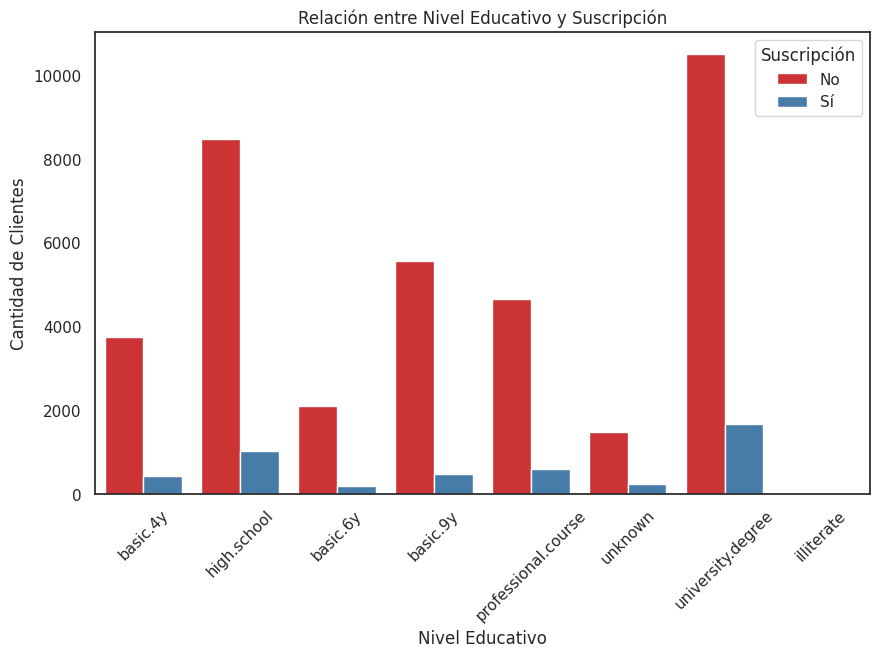

In [62]:
# Gráfico de barras para analizar las suscripciones por nivel educativo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='y', palette='Set1')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Nivel Educativo y Suscripción')
plt.xticks(rotation=45)
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()


*   De esta manera podemos visualizar a nuestros clientes, segun su nivel educativo.
*   Visualizamos una diferencia entre las Universidades básicas y el resto ( High.School - Professional.Course - University.Degree )
*   Podríamos investigar el nivel económico de cada una de ellas para validar las diferencias.






3. ¿Cuál es el impacto de la situación laboral de los clientes en su decisión de suscribirse a depósitos a plazo fijo?

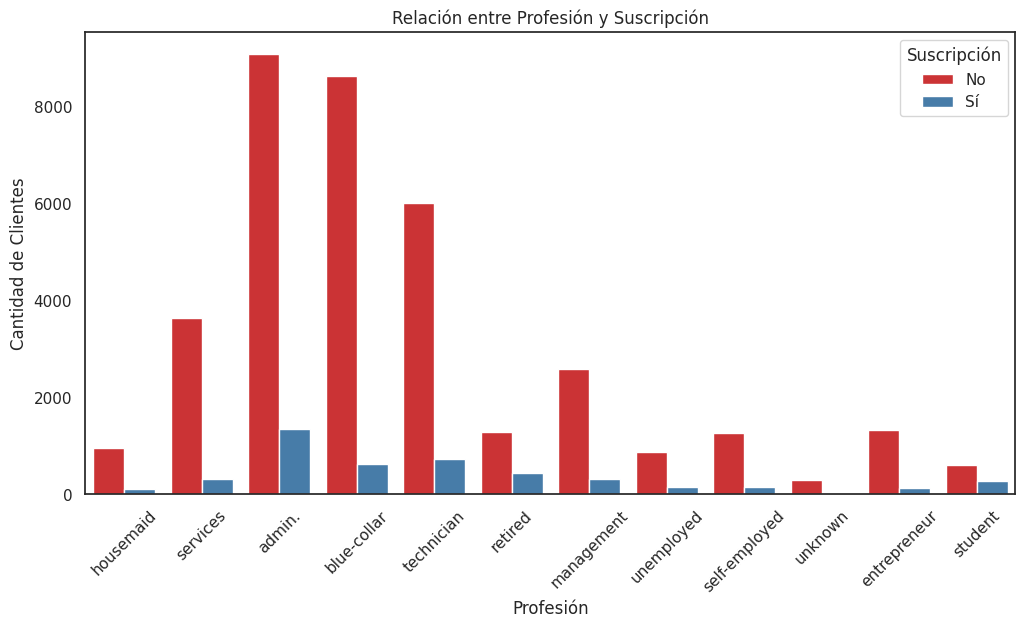

In [63]:
# # Gráfico de barras para analizar la relacion entre Profesión de los clientes a la suscripción de plazo fijo.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y', palette='Set1')
plt.xlabel('Profesión')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Profesión y Suscripción')
plt.xticks(rotation=45)
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

*   Podemos ver la diferencia de la situación laboral de cada cliente, como la situación económica en cada Profesión.
*   Continuando con el hilo del análisis, entendemos que los clientes con mejor posición económica tienden a tener mayor impacto en la suscripción a plazo fijo.



In [64]:
# Tabla de contingencia entre el trabajo y la suscripción
job_subscription = pd.crosstab(df['job'], df['y'])
print(job_subscription)

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


4.   Existen diferencias en las tasas de suscripcion entre los clientes con creditos en incumplimiento y los que no tienen ?

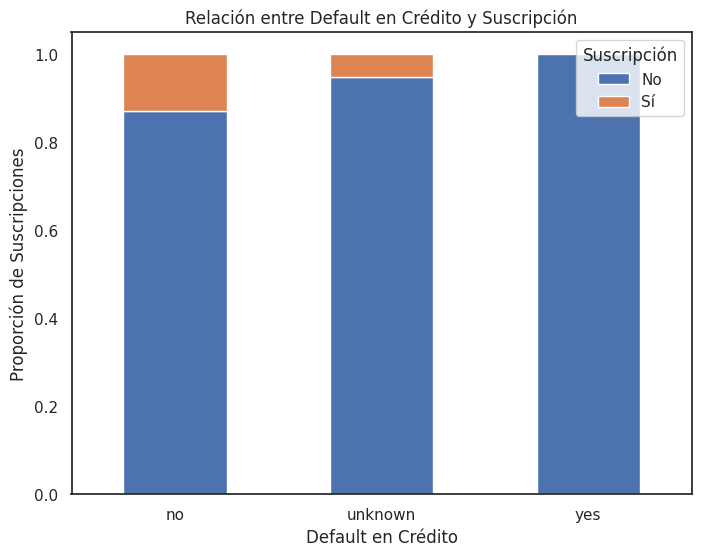

In [65]:
# Crear un DataFrame con las tasas de suscripción para cada categoría de default, y realizamos un groupby
default_subscription_rates = df.groupby('default')['y'].value_counts(normalize=True).unstack()

# Crear un gráfico de barras apiladas
default_subscription_rates.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Default en Crédito')
plt.ylabel('Proporción de Suscripciones')
plt.title('Relación entre Default en Crédito y Suscripción')
plt.xticks(rotation=0)
plt.legend(title='Suscripción', labels=['No', 'Sí'])
plt.show()

5. Hay alguna relación entre la Duración de la última llamada, a la decisión de sucripción del cliente a depósito a plazo fijo ?

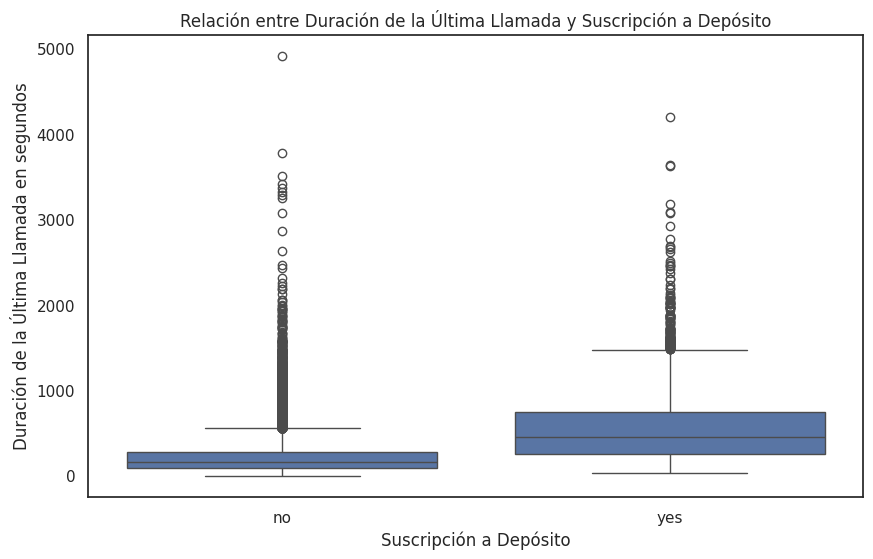

In [66]:
# Duración de la Ultima Llamada vs. Suscripción (Variables Bivariadas):

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='duration')
plt.xlabel('Suscripción a Depósito')
plt.ylabel('Duración de la Última Llamada en segundos')
plt.title('Relación entre Duración de la Última Llamada y Suscripción a Depósito')
plt.show()




*   Las llamadas que resultan en suscripciones tienden a tener una duración mas larga en promedio.

*   Las llamadas mas largas podrian implicar una mayor discusión y convencimiento, lo que podria influir en la decisión de suscribirse.
*   Podemos ver Outliers para ambos casos.


*   La mediana y el tamaño de la caja son mayores para los clientes suscriptos, indicando una tendencia hacia llamadas más largas en este grupo.







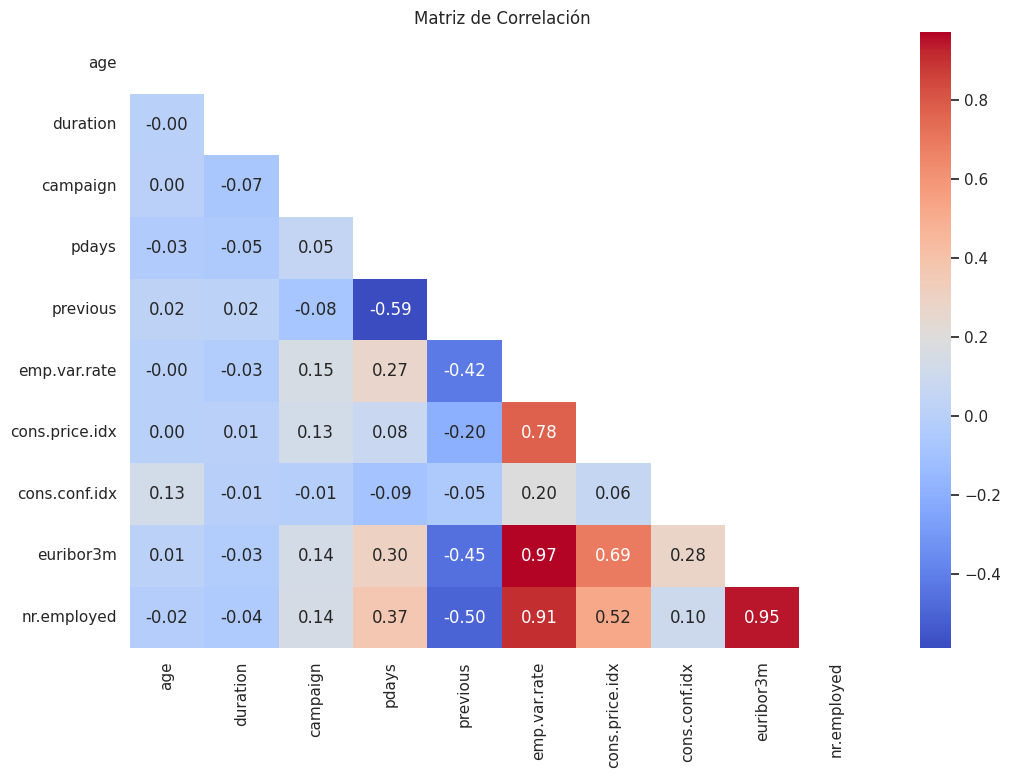

In [67]:
# Variables numéricas incluidas en la matriz de correlación
variables_numericas = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Calcula la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Máscara triangular superior para la visualización
mascara_superior = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Estilo de la visualización
sns.set(style="white")

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, mask=mascara_superior, annot=True, cmap="coolwarm", fmt=".2f")

# Ajuste de las etiquetas
plt.title('Matriz de Correlación')
plt.show()

Con la información obtenida, analizamos nuestras variables con correlación fuerte

In [68]:
# Estadísticas descriptivas
descriptive_stats = df[['euribor3m', 'emp.var.rate']].describe()

# Mostrar
print(descriptive_stats)

          euribor3m  emp.var.rate
count  41188.000000  41188.000000
mean       3.621291      0.081886
std        1.734447      1.570960
min        0.634000     -3.400000
25%        1.344000     -1.800000
50%        4.857000      1.100000
75%        4.961000      1.400000
max        5.045000      1.400000


<ipython-input-69-e026c06b3466>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy, x='month', y='euribor3m', label='euribor3m', ci=None)
<ipython-input-69-e026c06b3466>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy, x='month', y='emp.var.rate', label='emp.var.rate', ci=None)


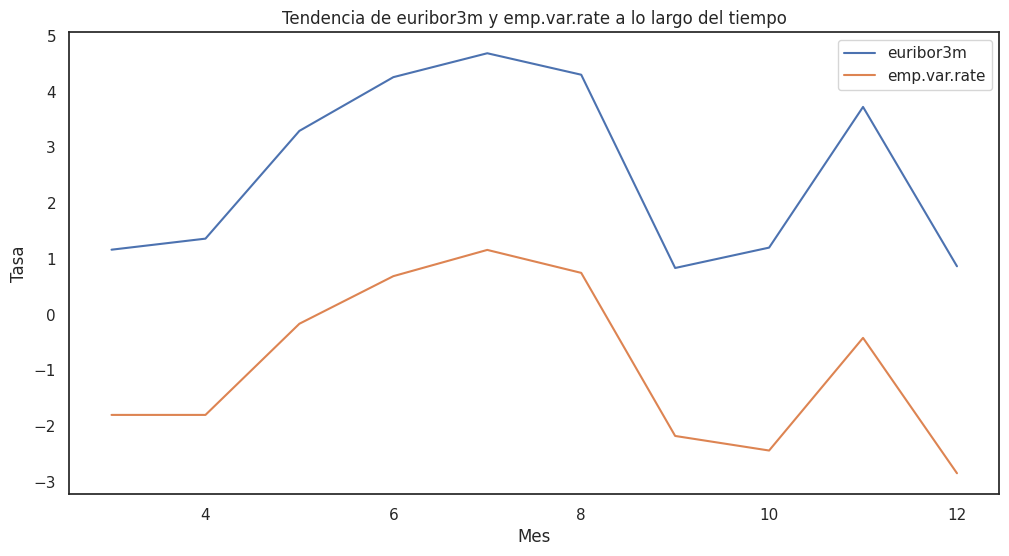

In [69]:
# Creamos una copia del DataFrame original para no afectar los datos originales
df_copy = df.copy()

# Convertir la columna 'month' al formato de fecha
df_copy['month'] = pd.to_datetime(df_copy['month'], format='%b').dt.month

# Crear gráfico de línea para euribor3m y emp.var.rate a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_copy, x='month', y='euribor3m', label='euribor3m', ci=None)
sns.lineplot(data=df_copy, x='month', y='emp.var.rate', label='emp.var.rate', ci=None)
plt.xlabel('Mes')
plt.ylabel('Tasa')
plt.title('Tendencia de euribor3m y emp.var.rate a lo largo del tiempo')
plt.legend()
plt.show()

<ipython-input-70-51a26bf3b1d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy, x='month', y='euribor3m', label='euribor3m', ci=None)
<ipython-input-70-51a26bf3b1d0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy, x='month', y='emp.var.rate', label='emp.var.rate', ci=None)
<ipython-input-70-51a26bf3b1d0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy, x='month', y='y', label='Suscripciones', ci=None)


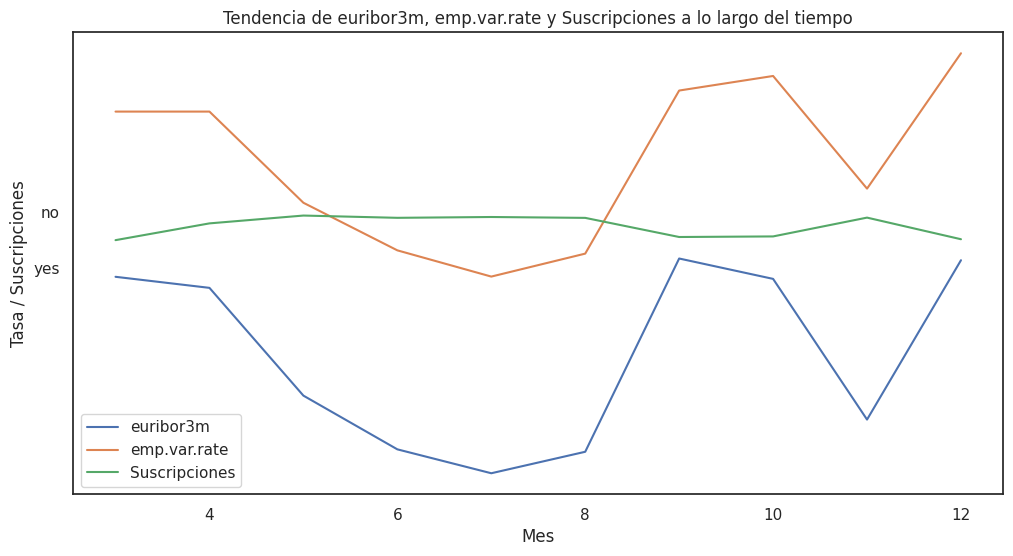

In [70]:
# Crear gráfico de línea con información sobre suscripciones a depósitos a plazo fijo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_copy, x='month', y='euribor3m', label='euribor3m', ci=None)
sns.lineplot(data=df_copy, x='month', y='emp.var.rate', label='emp.var.rate', ci=None)
sns.lineplot(data=df_copy, x='month', y='y', label='Suscripciones', ci=None)
plt.xlabel('Mes')
plt.ylabel('Tasa / Suscripciones')
plt.title('Tendencia de euribor3m, emp.var.rate y Suscripciones a lo largo del tiempo')
plt.legend()
plt.show()



*   Viendo la información obtenida, parece tener una tendencia lineal entre las dos variables. Esto sugiere que la relación entre las tasas y las suscripciones puede no ser tan directa y podría depender de otros factores.




A continuación, realizamos una matriz de correlación entre las dos variables para obtener un análisis mas profundo, y ver cómo afectan al modelo

In [71]:
# Creamos matriz de correlacion, usamos el método .corr() de Pandas para esto:
correlation_matrix = df_copy[['euribor3m', 'emp.var.rate', 'y']].corr()
print(correlation_matrix)

              euribor3m  emp.var.rate
euribor3m      1.000000      0.972245
emp.var.rate   0.972245      1.000000


<ipython-input-71-fb99df31af98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy[['euribor3m', 'emp.var.rate', 'y']].corr()


In [72]:
# Definimos nuestras variables independientes (X) y la variable dependiente (y):
X = df_copy[['euribor3m', 'emp.var.rate']]
y = df_copy['y']

In [73]:
# Dividimos los datos en conjuntos de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Creamos un modelo clasificador RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo con ambas variables
model_both = RandomForestClassifier(random_state=42)
model_both.fit(X_train, y_train)

# Predicciones
y_pred_both = model_both.predict(X_test)

# Evaluación del modelo con ambas variables
accuracy_both = accuracy_score(y_test, y_pred_both)
report_both = classification_report(y_test, y_pred_both)

print(f"Accuracy con ambas variables: {accuracy_both:.4f}")
print("Reporte de clasificación con ambas variables:\n", report_both)

Accuracy con ambas variables: 0.8909
Reporte de clasificación con ambas variables:
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.55      0.22      0.31       935

    accuracy                           0.89      8238
   macro avg       0.73      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238



Comparamos los resultados para ver cómo afecta la eliminación de una variable al rendimiento del modelo.

In [75]:
# Modelo sin emp.var.rate
X_no_emp_var_rate = df_copy[['euribor3m']]
X_train_no_emp_var_rate, X_test_no_emp_var_rate, y_train, y_test = train_test_split(X_no_emp_var_rate, y, test_size=0.2, random_state=42)

model_no_emp_var_rate = RandomForestClassifier(random_state=42)
model_no_emp_var_rate.fit(X_train_no_emp_var_rate, y_train)

y_pred_no_emp_var_rate = model_no_emp_var_rate.predict(X_test_no_emp_var_rate)

accuracy_no_emp_var_rate = accuracy_score(y_test, y_pred_no_emp_var_rate)
report_no_emp_var_rate = classification_report(y_test, y_pred_no_emp_var_rate)

print(f"\nAccuracy sin emp.var.rate: {accuracy_no_emp_var_rate:.4f}")
print("Reporte de clasificación sin emp.var.rate:\n", report_no_emp_var_rate)


Accuracy sin emp.var.rate: 0.8903
Reporte de clasificación sin emp.var.rate:
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.54      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.72      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



Notamos que las variables están altamente correlacionadas.

Realizamos un análisis descriptivo de las variables con correlación fuerte con un gráfico de dispersión para ver el comportamiento de los datos.

       cons.price.idx  emp.var.rate
count    41188.000000  41188.000000
mean        93.575664      0.081886
std          0.578840      1.570960
min         92.201000     -3.400000
25%         93.075000     -1.800000
50%         93.749000      1.100000
75%         93.994000      1.400000
max         94.767000      1.400000


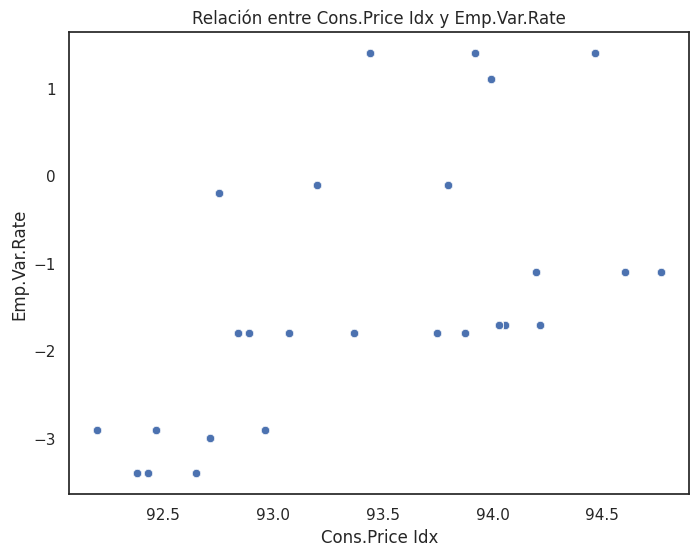

In [76]:
# Análisis descriptivo
print(df_copy[['cons.price.idx', 'emp.var.rate']].describe())

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='cons.price.idx', y='emp.var.rate')
plt.xlabel('Cons.Price Idx')
plt.ylabel('Emp.Var.Rate')
plt.title('Relación entre Cons.Price Idx y Emp.Var.Rate')
plt.show()

        nr.employed  emp.var.rate
count  41188.000000  41188.000000
mean    5167.035911      0.081886
std       72.251528      1.570960
min     4963.600000     -3.400000
25%     5099.100000     -1.800000
50%     5191.000000      1.100000
75%     5228.100000      1.400000
max     5228.100000      1.400000


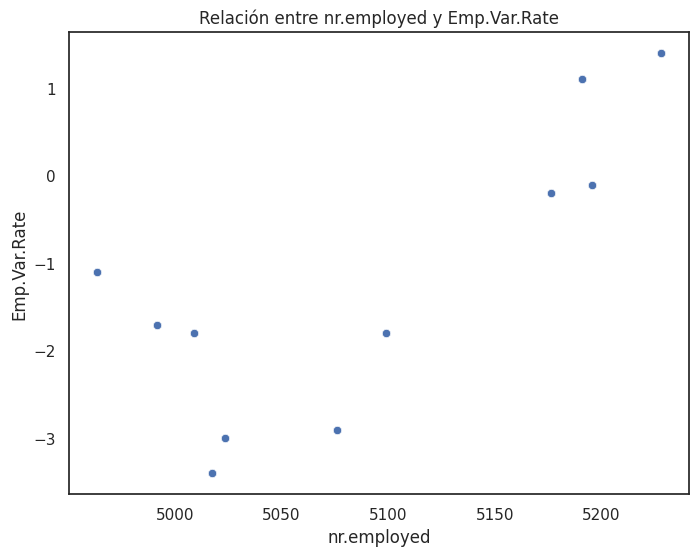

In [77]:
# Análisis descriptivo
print(df_copy[['nr.employed', 'emp.var.rate']].describe())

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='nr.employed', y='emp.var.rate')
plt.xlabel('nr.employed')
plt.ylabel('Emp.Var.Rate')
plt.title('Relación entre nr.employed y Emp.Var.Rate')
plt.show()

## A continuación de nuestro análisis de las variables con fuerte correlación, hacemos una codificación One-Hot de las variables categóricas, e inicializamos un árbol de decisión y entrenamos el modelo para ver los resultados.

In [78]:
# Realizar codificación one-hot de las variables categóricas
X_train_encoded = pd.get_dummies(X_train)

# Imprimir las columnas agregadas durante la codificación one-hot
print("Columnas agregadas durante la codificación one-hot:")
print(X_train_encoded.columns)

# Inicializar el clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_clf.fit(X_train_encoded, y_train)

Columnas agregadas durante la codificación one-hot:
Index(['euribor3m', 'emp.var.rate'], dtype='object')


DecisionTreeClassifier(random_state=42)

Matriz de Confusión:
[[7147  156]
 [ 742  193]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.55      0.21      0.30       935

    accuracy                           0.89      8238
   macro avg       0.73      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



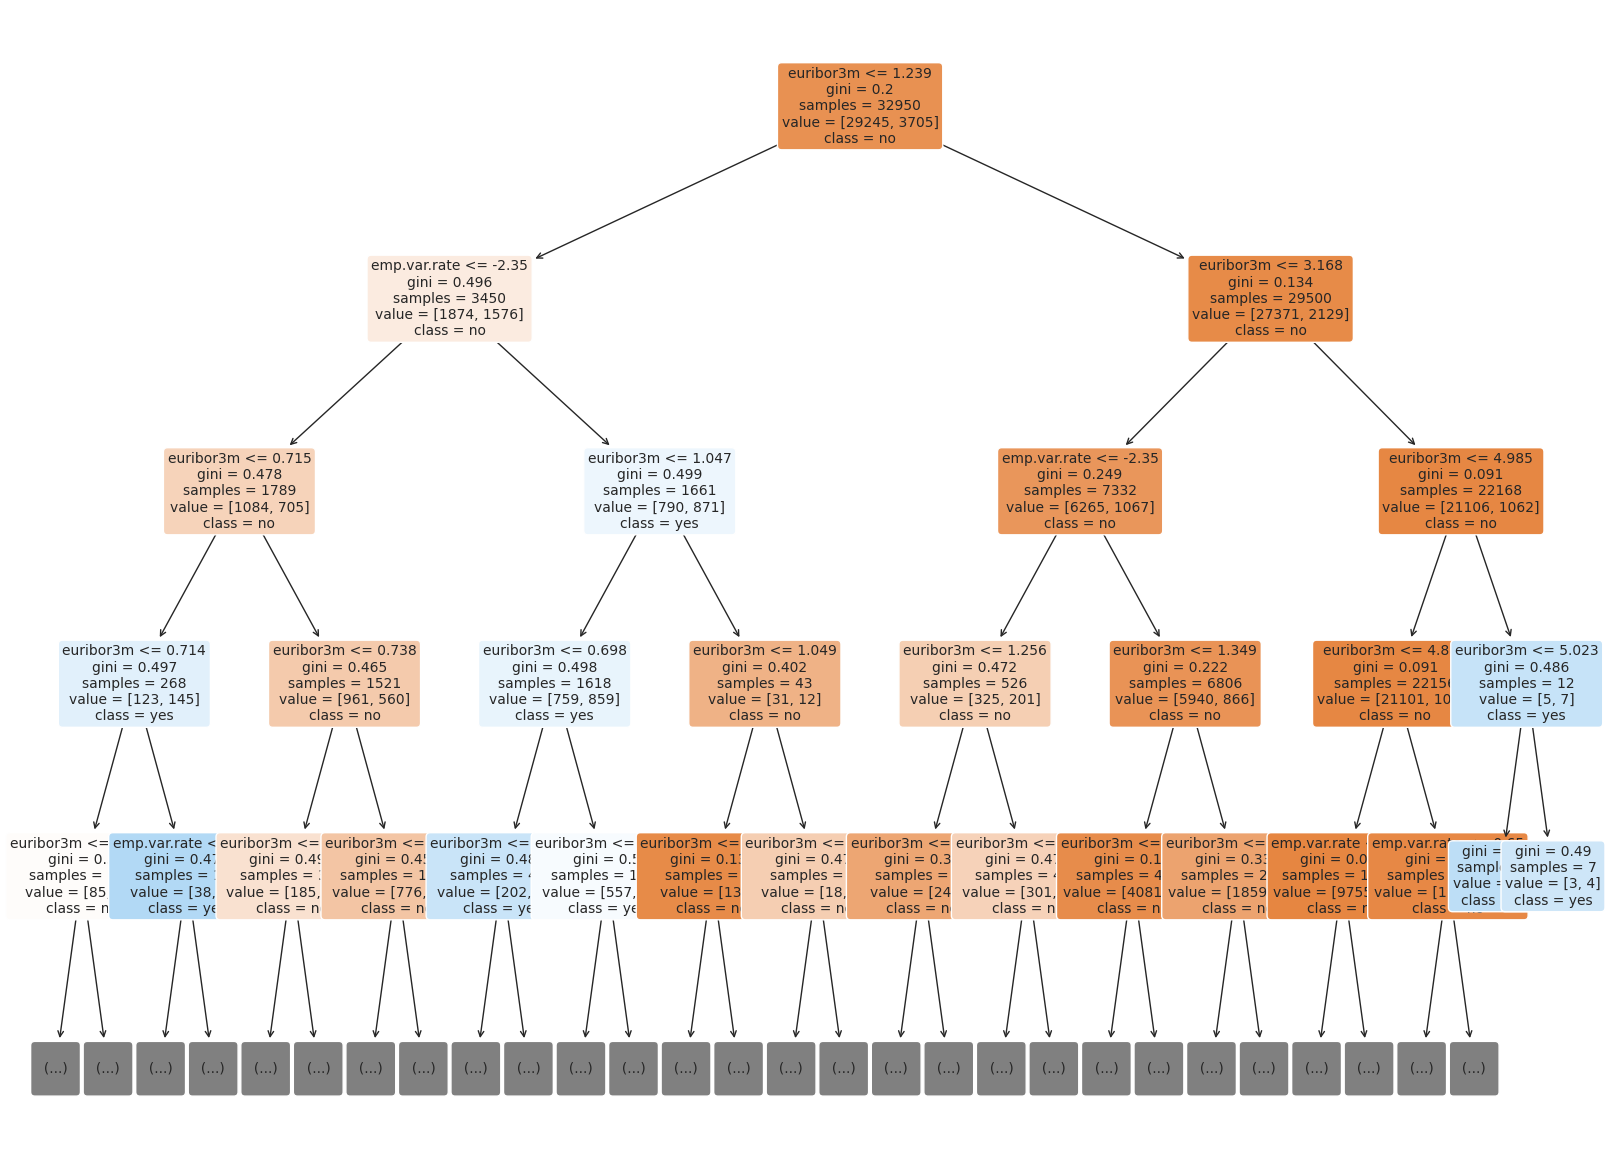

In [79]:
# Realizar codificación one-hot en el conjunto de prueba
X_test_encoded = pd.get_dummies(X_test)

# Asegurarnos de que ambos conjuntos tengan las mismas columnas
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test_encoded)

# Evaluación del modelo en el conjunto de prueba
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 15))
plot_tree(tree_clf, filled=True, feature_names=X_train_encoded.columns, class_names=['no', 'yes'], rounded=True, fontsize=10, max_depth=4)
plt.show()

In [80]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(tree_clf, filled=True, feature_names=X_train_encoded.columns, class_names=['no', 'yes'], rounded=True, special_characters=True, max_depth=5)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # Exporta a una imagen PNG

True

Descargamos la imagen para poder visualizarla mejor

In [81]:
from google.colab import files

# Descarga el archivo tree.png
files.download('tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Arbol de decisión



*   Utilizamos un árbol de decisión como modelo predictivo para analizar la importancia de las variables en la predicción de suscripciones a depósitos a plazo fijo.

*   Ajustamos el árbol de decisión y observamos su rendimiento en términos de precisión, recall, f1-score y la matriz de confusión.
*   Experimentamos con la profundidad del árbol (max_depth) para evitar sobreajuste y mejorar la interpretabilidad.

**Varibales correlacionadas:**

*   Identificamos variables altamente correlacionadas, como euribor3m y emp.var.rate, utilizando análisis descriptivos y visualizaciones.

*   Exploramos cómo estas variables se correlacionan con la variable objetivo (suscripciones a depósitos a plazo fijo, 'y') y cómo afectan al rendimiento del modelo predictivo.

**Análisis de Importancia de Variables:**
*   Observamos que el árbol de decisión asignó importancia a ciertas variables, lo que nos ayudó a comprender qué características son más influyentes en las predicciones del modelo.

*   Analizamos cómo el árbol de decisión toma decisiones basadas en condiciones como "euribor3m <= 1.239".

**Decisiones sobre Variables:**

*   Consideramos la posibilidad de eliminar variables correlacionadas para evitar multicolinealidad y mejorar la simplicidad del modelo.
*   Observamos que, en nuestro caso, eliminar una de las variables correlacionadas no afectó significativamente el rendimiento del modelo.


En resumen, el análisis del árbol de decisión y las variables correlacionadas nos brindaron una comprensión más profunda de las relaciones en los datos y nos permitieron tomar decisiones informadas sobre qué variables incluir en nuestro modelo predictivo. Este enfoque también proporciona insights sobre cómo las variables afectan las decisiones del modelo y su capacidad para prever suscripciones a depósitos a plazo fijo.






### A continuación, realizamos un modelo "Random Forest" lo cual es lo mas apropiado para nuestro Dataset por los datos obtenidos, ya que es una extensión de los árboles de decisión y generalmente ofrece un rendimiento robusto.

### **Random Forest**

Implementamos modelo Random Forest y analizamos la importancia de las variables con Scikit-Learn:

Accuracy del modelo Random Forest: 0.8909
Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.55      0.22      0.31       935

    accuracy                           0.89      8238
   macro avg       0.73      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238


Importancia de las variables:
euribor3m: 0.7157
emp.var.rate: 0.2843


<ipython-input-82-3bb014cdd23e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X_train_encoded.columns, orient='h', palette='viridis')


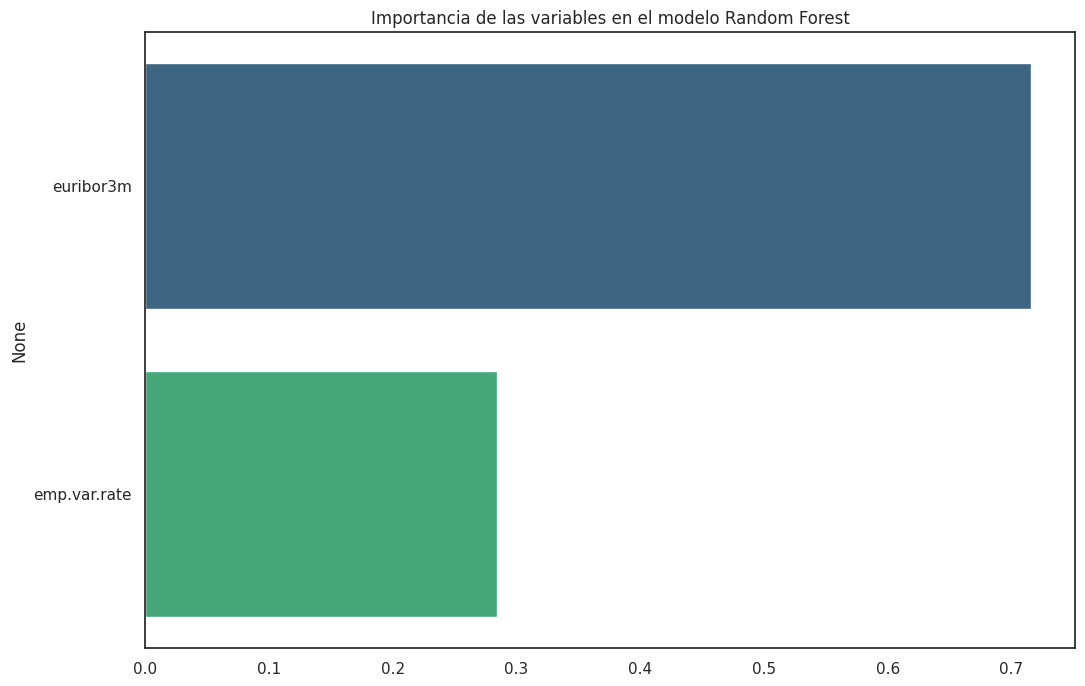

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Inicializar el clasificador Random Forest
random_forest_clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
random_forest_clf.fit(X_train_encoded, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = random_forest_clf.predict(X_test_encoded)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy del modelo Random Forest: {accuracy_rf:.4f}')

# Mostrar el reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_rf))

# Obtener la importancia de las variables
feature_importances = random_forest_clf.feature_importances_

# Mostrar la importancia de cada variable
print('\nImportancia de las variables:')
for feature, importance in zip(X_train_encoded.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')

# Visualizar la importancia de las variables

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=X_train_encoded.columns, orient='h', palette='viridis')
plt.title('Importancia de las variables en el modelo Random Forest')
plt.show()

**Observaciones:**



*   Parece que el modelo Random Forest ha proporcionado resultados similares a los obtenidos con el árbol de decisión.
*   La importancia de las variables muestra que euribor3m es la característica más influyente en el modelo, seguida por emp.var.rate.



Debido a los resultados, vamos a intentar ajustar los hiperparámetros, para evaluar una mejora del rendimiento del modelo utilizando técnica como la búsqueda de cuadícula "GridSearchCV" para encontrar una combinación óptima.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar GridSearchCV en los datos
grid_search.fit(X_train_encoded, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test_encoded)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Utilizamos los "Mejores hiperparámetros" obtenidos por la búsqueda para evaluar el rendimiento del modelo RandomForest ajustado en el conjunto de prueba, mostrando una Matriz de Confusión y el reporte de clasificacion.

In [84]:
# Evaluar el modelo ajustado en el conjunto de prueba
y_pred_rf_tuned = best_rf_model.predict(X_test_encoded)

# Mostrar la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_tuned))

Matriz de Confusión:
[[7149  154]
 [ 745  190]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.55      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.73      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



Por los datos obtenidos, sabemos que hay un desbalanceo de Clases dado por nuestra variable objetivo (Mayor cantidad de "no" que de "yes"). Por eso decidímos el uso de pesos de clase en los modelos.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop('y', axis=1)
y = df['y']

# Codificar las variables categóricas con one-hot encoding
X_encoded = pd.get_dummies(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de RandomForest con pesos de clase
class_weights = {'no': 1, 'yes': 5}
rf_clf_weighted = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Entrenar el modelo
rf_clf_weighted.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_weighted = rf_clf_weighted.predict(X_test)

# Evaluar el rendimiento del modelo con pesos de clase
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
confusion_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
classification_report_weighted = classification_report(y_test, y_pred_weighted)

print("Accuracy con pesos de clase:", accuracy_weighted)
print("Matriz de Confusión con pesos de clase:\n", confusion_matrix_weighted)
print("Reporte de clasificación con pesos de clase:\n", classification_report_weighted)

Accuracy con pesos de clase: 0.9087157076960427
Matriz de Confusión con pesos de clase:
 [[7107  196]
 [ 556  379]]
Reporte de clasificación con pesos de clase:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.41      0.50       935

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238





*   Parece que el modelo está mejorando en la clasificación de la clase positiva ("yes"), ya que los falsos negativos (556) disminuyeron en comparación con el modelo sin pesos de clase.
*   El informe de clasificación proporciona métricas detalladas para cada clase. Podemos observar mejoras en la precisión, recuperación y puntuación F1 para la clase "yes" en comparación con el modelo sin pesos de clase.



### Validación Cruzada con Búsqueda de Hiperparámetros (Grid Search):

Utilizaremos la validación cruzada para evaluar el rendimiento del modelo en diferentes divisiones de los datos y realizaremos una búsqueda de hiperparámetros para encontrar la combinación óptima.

In [86]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inicializar el clasificador RandomForest
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Inicializar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train_encoded, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el modelo con los mejores hiperparámetros
best_rf_clf = grid_search.best_estimator_

Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Usamos los "Mejores Hiperparámetros" Obtenidos

In [87]:
# Inicializar el clasificador RandomForest con los nuevos hiperparámetros
rf_clf_tuned = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42, class_weight='balanced')

# Entrenar el modelo
rf_clf_tuned.fit(X_train_encoded, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tuned = rf_clf_tuned.predict(X_test_encoded)

# Evaluar el rendimiento del modelo ajustado
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)

# Mostrar resultados
print("Accuracy con hiperparámetros ajustados y pesos de clase:", accuracy_tuned)
print("Matriz de Confusión con hiperparámetros ajustados y pesos de clase:\n", conf_matrix_tuned)
print("Reporte de clasificación con hiperparámetros ajustados y pesos de clase:\n", classification_report_tuned)

Accuracy con hiperparámetros ajustados y pesos de clase: 0.83709638261714
Matriz de Confusión con hiperparámetros ajustados y pesos de clase:
 [[6331  972]
 [ 370  565]]
Reporte de clasificación con hiperparámetros ajustados y pesos de clase:
               precision    recall  f1-score   support

          no       0.94      0.87      0.90      7303
         yes       0.37      0.60      0.46       935

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.68      8238
weighted avg       0.88      0.84      0.85      8238



Al ajustar los hiperparámetros y utilizar pesos de clase, observamos una disminución en la precisión global del modelo, pero esto podría estar relacionado con el equilibrio que se logra al mejorar el rendimiento para la clase minoritaria "yes". Aunque la precisión global disminuyó, nos acercamos a nuestro objetivo.

En resumen, el objetivo era reducir los falsos negativos y identificar las suscripciones a plazo fijo de la clase "yes", por ende los ajustes del modelo fueron beneficiosos.

Realizamos un gráfico para visualizar la Curva AUC-ROC para el modelo RandomForest, convirtiendo las etiquetas de clase a valores binarios con Label_Encoder.

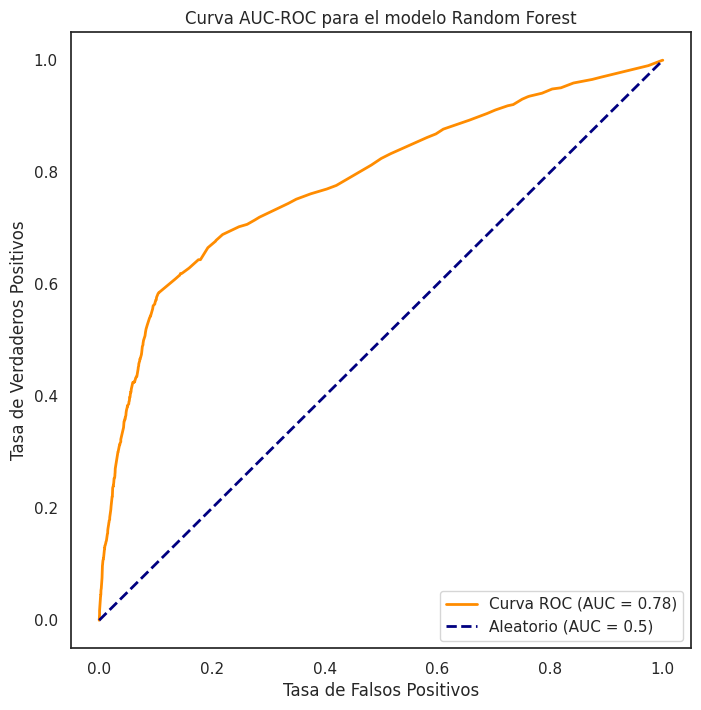

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convertir las etiquetas de clase a valores binarios
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Obtener las probabilidades predichas en lugar de las etiquetas de clase
y_prob_rf = best_rf_model.predict_proba(X_test_encoded)[:, 1]

# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva AUC-ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva AUC-ROC para el modelo Random Forest')
plt.legend(loc='lower right')
plt.show()



*   **Eje X (Tasa de Falsos Positivos):**

Explica que el eje X representa la tasa de falsos positivos. Proporción de instancias negativas incorrectamente clasificadas como positivas.

*   **Eje Y (Tasa de Verdaderos Positivos):**

Describe que el eje Y representa la tasa de verdaderos positivos. Proporción de instancias positivas correctamente clasificadas como positivas.
*   **Área bajo la Curva (AUC):**

Menciona el valor específico del AUC (en este caso, 0.78) y explica que indica la capacidad del modelo para distinguir entre clases positivas y negativas.


*   **Línea de Referencia Aleatoria:**

Indica que la línea diagonal desde (0,0) hasta (1,1) representa una predicción aleatoria, y el AUC debería estar por encima de esta línea para considerarse un buen modelo.



A continuación, realizamos una prueba de Oversampling, para disminuir los datos, ya que obtenemos información sesgada por el desbalance de nuestro dataset para el modelo. Para eso primero creamos una copia para no poner en riesgo nuestros datos.

In [89]:
# Crear copias de los conjuntos de entrenamiento y prueba
X_train_original = X_train_encoded.copy()
y_train_original = y_train.copy()

X_test_original = X_test_encoded.copy()
y_test_original = y_test.copy()

In [97]:
# Importamos biblioteca imbalanced-learn
!pip install -U imbalanced-learn

La técnica utilizada para abordar el desequilibrio de clases es SMOTE (Synthetic Minority Over-sampling Technique).

In [91]:
from imblearn.over_sampling import SMOTE

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_original, y_train_original)

Probamos el modelo

In [92]:
# Inicializar el clasificador RandomForest
rf_classifier_oversampled = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los conjuntos de datos de entrenamiento con oversampling
rf_classifier_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Realizar predicciones en el conjunto de prueba
y_pred_rf_oversampled = rf_classifier_oversampled.predict(X_test_original)

# Evaluar el rendimiento del modelo en el conjunto de prueba original
accuracy_rf_oversampled = accuracy_score(y_test_original, y_pred_rf_oversampled)
print(f'Accuracy del modelo Random Forest con oversampling: {accuracy_rf_oversampled:.4f}')

# Mostrar el reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test_original, y_pred_rf_oversampled))

Accuracy del modelo Random Forest con oversampling: 0.8350
Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.94      0.87      0.90      7303
         yes       0.36      0.58      0.44       935

    accuracy                           0.84      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.84      0.85      8238



El resultado muestra que el modelo Random Forest entrenado con oversampling tiene un rendimiento similar al modelo sin oversampling. La precisión para la clase 'yes' ha mejorado, pero el recall ha disminuido, lo que indica que el modelo puede estar clasificando menos casos positivos correctamente.
Es importante considerar que el oversampling puede no siempre mejorar el rendimiento del modelo, y en algunos casos, incluso puede empeorar.

Vamos a graficar los resultados de las dos curvas ROC para obtener mejor visualización de la diferencia de los modelos.

In [93]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc

# Realizar oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_encoded, y_train)

# Entrenar el modelo Random Forest con oversampling
random_forest_clf_oversampling = RandomForestClassifier(random_state=42)
random_forest_clf_oversampling.fit(X_train_oversampled, y_train_oversampled)

# Calcular las probabilidades de predicción en el conjunto de prueba
y_prob_rf_oversampling = random_forest_clf_oversampling.predict_proba(X_test_encoded)[:, 1]

# Calcular la curva ROC
fpr_rf_oversampling, tpr_rf_oversampling, thresholds_rf_oversampling = roc_curve(y_test, y_prob_rf_oversampling, pos_label='yes')
roc_auc_rf_oversampling = auc(fpr_rf_oversampling, tpr_rf_oversampling)

In [94]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf, pos_label='yes')

In [95]:
fpr_rf_oversampling, tpr_rf_oversampling, thresholds_rf_oversampling = roc_curve(y_test, y_prob_rf_oversampling, pos_label='yes')

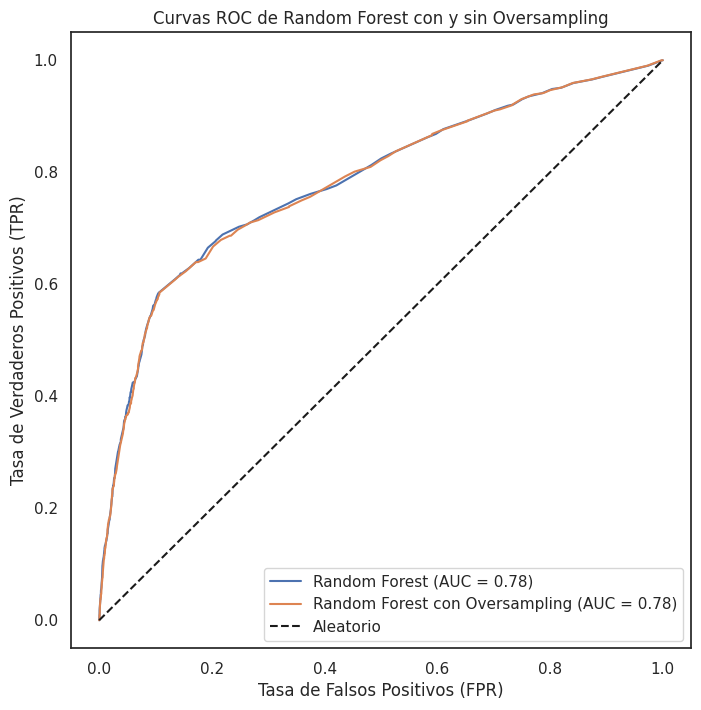

In [96]:

# Graficar las curvas ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_rf_oversampling, tpr_rf_oversampling, label=f'Random Forest con Oversampling (AUC = {roc_auc_rf_oversampling:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Random Forest con y sin Oversampling')
plt.legend()
plt.show()

## CONCLUSIONES:

La variable objetivo, "y" (Si o No a la suscripción a un depósito a plazo fijo), está desbalanceada; tenemos un sesgo en nuestros datos, teniendo un %11,27 para los que "Si" se suscribieron mientras que el %88,73 restante no se suscribieron. Llegando a esta información, utilizamos técnicas de Oversampling para obtener mejores resultados del modelo.

De esta manera, concluimos que el mejor modelo fue RandomForest, junto con la técnica aplicada de pesos de clases para disminuir la información sesgada que teníamos en nuestro proyecto. A pesar de probar con Oversampling, no logramos mejorar el resultado. Optamos por dejar la optimización del modelo, ya que es el que mejor puede predecir si un cliente se suscribe a un plazo fijo o no.

El modelo alcanzó una exactitud (accuracy) del 91%, una precisión (precisión) del 66% para aquellos que sí (yes) se suscribieron a un depósito a plazo fijo, una tasa de verdaderos positivos (Recall) del 40.64%, y un área bajo la curva ROC igual a 0.78.